<a href="https://colab.research.google.com/github/ANGELLOPARR/csc466-project/blob/main/KmeansExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from tensorflow.keras import layers, models, Input, Model
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

iris = load_iris()
target_names = iris['target_names']

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
display(df)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


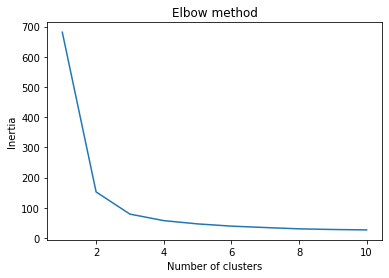

In [2]:
X = df.drop(columns=['target'])

error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    error.append(kmeans.inertia_)

plt.plot(range(1, 11), error)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

display(y_kmeans)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [5]:
tp = 0
fp = 0
tn = 0
fn = 0

for i in range(len(y_kmeans)):
  for j in range(i + 1, (len(y_kmeans))):
    if y_kmeans[i] == y_kmeans[j]:
      if df['target'].values[i] == df['target'].values[j]:
        tp += 1
      else:
        fp += 1
    else:
      if df['target'].values[i] == df['target'].values[j]:
        fn += 1
      else:
        tn += 1

print(f'True Positives={tp}\nFalse Positives={fp}\nTrue Negatives={tn}\nFalse Negatives={fn}\n')

p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * ((p * r) / (p + r))

print(f'Precision = {p}\nRecall = {r}\nF1 Score = {f1}')

True Positives=3075
False Positives=744
True Negatives=6756
False Negatives=600

Precision = 0.805184603299293
Recall = 0.8367346938775511
F1 Score = 0.8206565252201762


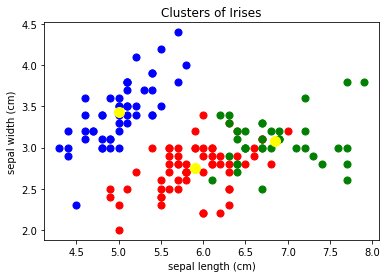

In [7]:
plt.scatter(X.values[y_kmeans==0, 0], X.values[y_kmeans==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(X.values[y_kmeans==1, 0], X.values[y_kmeans==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(X.values[y_kmeans==2, 0], X.values[y_kmeans==2, 1], s=50, c='green', label ='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of Irises')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

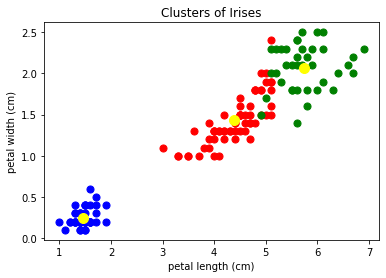

In [10]:
plt.scatter(X.values[y_kmeans==0, 2], X.values[y_kmeans==0, 3], s=50, c='red', label ='Cluster 1')
plt.scatter(X.values[y_kmeans==1, 2], X.values[y_kmeans==1, 3], s=50, c='blue', label ='Cluster 2')
plt.scatter(X.values[y_kmeans==2, 2], X.values[y_kmeans==2, 3], s=50, c='green', label ='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of Irises')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()